<a href="https://colab.research.google.com/github/ADC1811/CODSOFT/blob/main/Task_2_CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Essential Libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

**Data Collection and Data Preprocessing**

In [4]:
dsmov = pd.read_csv('/content/t2.dat', delimiter='::',names=["MovieID","Title","Genres"], encoding='latin-1',engine='python')
dsmov.dropna(inplace=True)
dsmov.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
dsrat=pd.read_csv('/content/ratings.dat',delimiter='::',names=["UserID","MovieID","Rating","TimeStamp"], engine='python')
dsrat.dropna(inplace=True)
dsrat.head()

,UserID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
dsuser=pd.read_csv('/content/users.dat',delimiter='::',names=["UserID","Gender","Age","Occupation","ZipCode"],engine='python')
dsuser.dropna(inplace=True)
dsuser.head()

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
dsmov.shape

(3883, 3)

In [10]:
dsrat.shape

(1000209, 4)

In [11]:
dsuser.shape

(6040, 5)

**Creating of a New Data Set**

In [12]:
newdf=dsmov.merge(dsrat,on='MovieID',how='inner')
newdf.head()

,MovieID,Title,Genres,UserID,Rating,TimeStamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [13]:
newdf.shape

(1000209, 6)

In [14]:
newds=newdf.merge(dsuser,on='UserID',how='inner')
newds.head()

,MovieID,Title,Genres,UserID,Rating,TimeStamp,Gender,Age,Occupation,ZipCode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [15]:
newds.to_csv("New.csv")

**Performing Exploratory Data Analysis on the Data Set**

In [16]:
newds['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

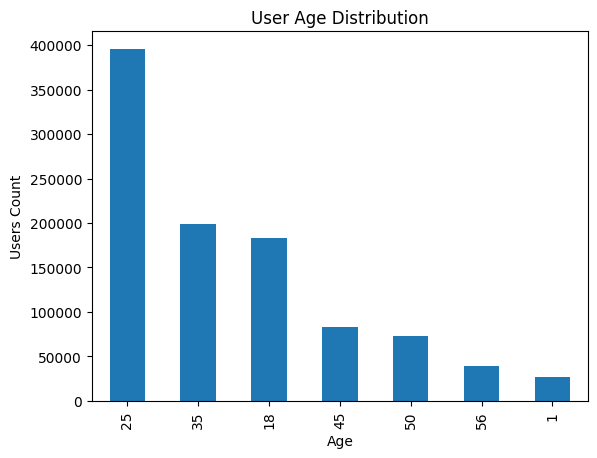

In [17]:
newds['Age'].value_counts().plot(kind='bar')
plt.title("User Age Distribution")
plt.xlabel('Age')
plt.ylabel('Users Count')
plt.show()

In [18]:
toystoryRating=newds[newds['Title'].str.contains('Toy Story')==True]
toystoryRating

,MovieID,Title,Genres,UserID,Rating,TimeStamp,Gender,Age,Occupation,ZipCode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


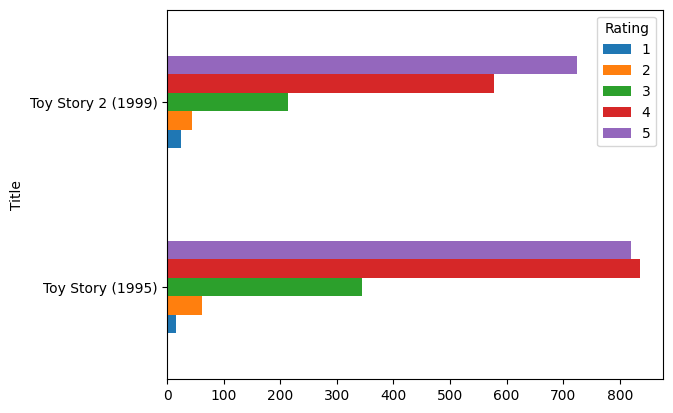

In [19]:
toystoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

**Applying Feature Engineering**

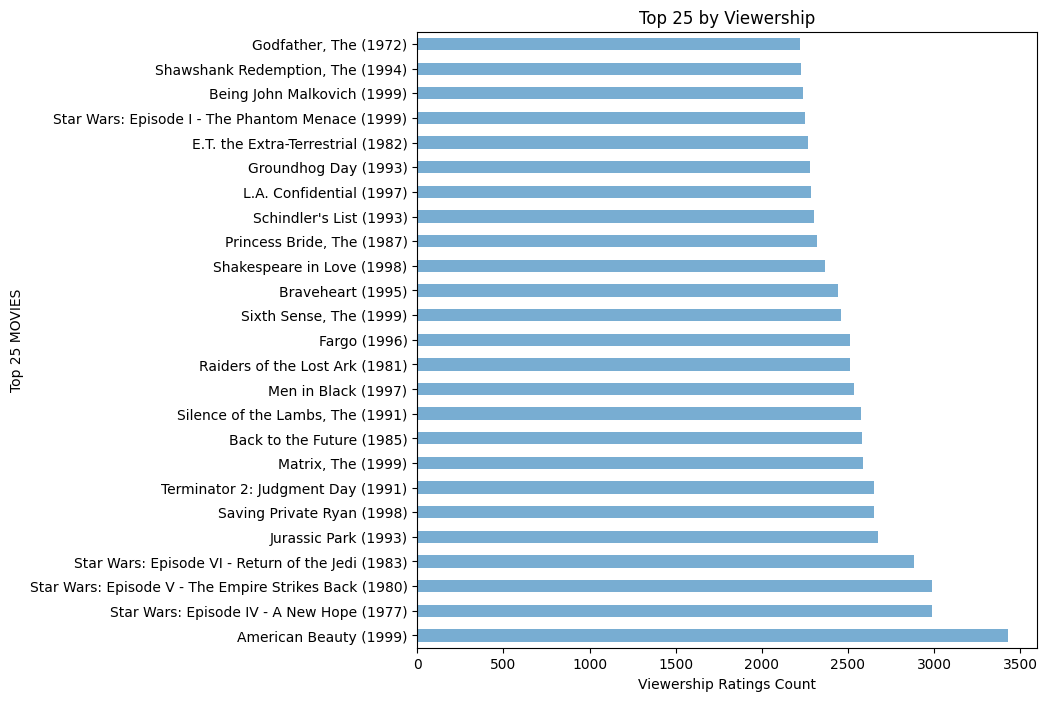

In [20]:
ds25=newds.groupby('Title').size().sort_values(ascending=False)[:25]
ds25
ds25.plot(kind='barh',alpha=0.6,figsize=(8,8))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Top 25 MOVIES")
plt.title("Top 25 by Viewership")
plt.show()

**Finding out all the Genres of the Movies**

In [21]:
ratonehot=newds['Genres'].str.get_dummies("|")
ratonehot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [22]:
newds=pd.concat([newds,ratonehot],axis=1)
newds.head(3)

,MovieID,Title,Genres,UserID,Rating,TimeStamp,Gender,Age,Occupation,ZipCode,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0


In [23]:
newds.to_csv("Final.csv")

**Visualising the Data Set for all the affecting factors**

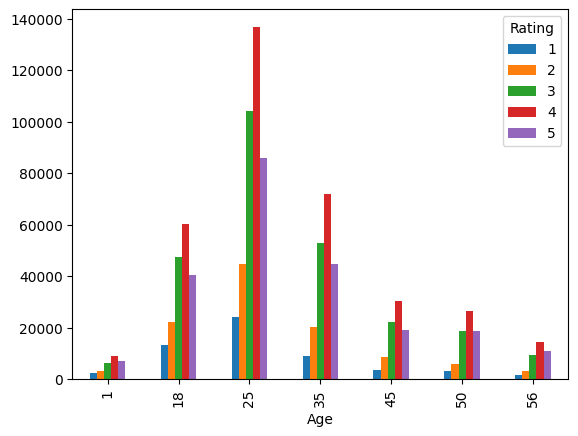

In [24]:
newds.groupby(['Age','Rating']).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

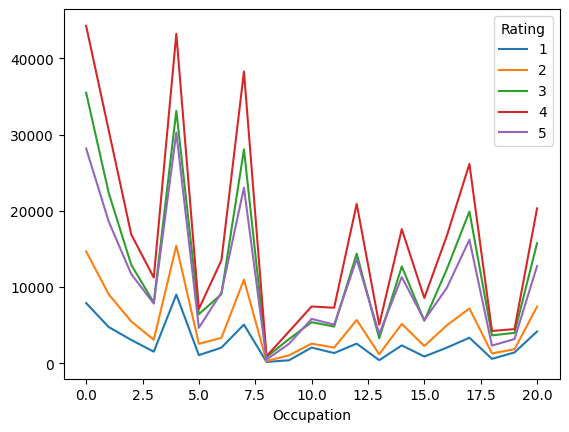

In [25]:
newds.groupby(['Occupation','Rating']).size().unstack().plot(kind='line',stacked=False,legend=True)
plt.show()

**Appropriate Model Prediction for Movie rating prediction**

In [27]:
f=first_500[['MovieID','Age','Occupation']].values
l=first_500[['Rating']].values
f

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [2394,   18,    3],
       [2402,   18,    3],
       [2404,   18,    3]])

In [44]:
X_train,y_train,X_test,y_test=train_test_split(f,l,test_size=0.33,random_state=42)

In [47]:
X_train

array([[3035,   35,    1],
       [1393,   25,   17],
       [3198,   35,    1],
       ...,
       [1073,   18,    3],
       [ 784,   35,    1],
       [2802,   50,    9]])

In [48]:
X_test

array([[3],
       [3],
       [3],
       [3],
       [5],
       [5],
       [2],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [5],
       [4],
       [5],
       [5],
       [3],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [5],
       [3],
       [5],
       [3],
       [5],
       [4],
       [5],
       [3],
       [5],
       [4],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
    

**Using Random Forest Classifier Algorithm for predicting the accuracy of the data**

In [59]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,X_test)
p=model.predict(y_train)
model.score(X_train,X_test)
accuracy=round(model.score(X_train,X_test)*100,1)
accuracy

<ipython-input-59-65aa3efb7f4e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,X_test)


100.0